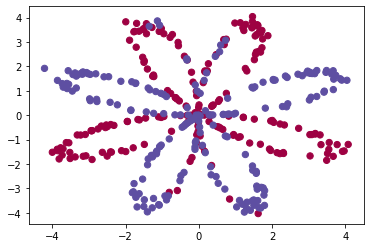

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

#加载和查看数据集
X, Y = load_planar_dataset()

#数据可视化
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)#绘制散点图
plt.show()

In [10]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]

print("X维度为：" + str(shape_X))
print("Y维度为：" + str(shape_Y))
print("数据集里面的数据有：" + str(m) + "个")

X维度为：(2, 400)
Y维度为：(1, 400)
数据集里面的数据有：400个


In [11]:
#查看简单的Logistic回归
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

F:\Anaconda3\envs\tfpy3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

逻辑回归的准确性：47%(正确标记的数据点所占的百分比)


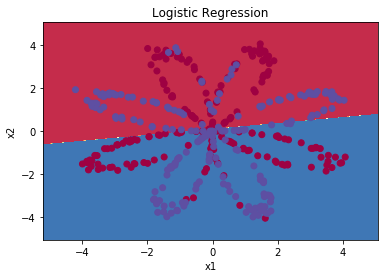

In [14]:
plot_decision_boundary(lambda x: clf.predict(x), X, np.squeeze(Y))#绘制决策边界
plt.title("Logistic Regression")
LR_predictions = clf.predict(X.T)#预测结果
print("逻辑回归的准确性：%d" % float((np.dot(Y, LR_predictions) +
                            np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size)*100)+
     "%" +"(正确标记的数据点所占的百分比)")

In [15]:
#定义神经网络结构（输入单元的数量，隐藏单元的数量等）
def layer_sizes(X, Y):
    """
    参数：
    X - 输入数据集，维度为（输入的数量，训练/测试的数量）
    Y - 标签，维度为（输入的数量，训练/测试数量)
    
    返回：
    n_x - 输入层的数量
    n_h - 隐藏层的数量
    n_y - 输出层的数量
    """
    n_x = X.shape[0]#输入层
    n_h = 4
    n_y = Y.shape[0]#输出层
    
    return (n_x, n_h, n_y)

In [16]:
print("======================测试layer_sizes==========================")
X_asses, Y_asses = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_asses, Y_asses)
print("输入层的节点数量为：n_x = " + str(n_x))
print("隐藏层的节点数量为：n_h = " + str(n_h))
print("输出层的节点数量为：n_y = " + str(n_y))

======================测试layer_sizes==========================
输入层的节点数量为：n_x = 5
隐藏层的节点数量为：n_h = 4
输出层的节点数量为：n_y = 2


In [60]:
#初始化模型参数
def initialize_parameters(n_x, n_h, n_y):
    """
    参数：
        n_x - 输入层节点的数量
        n_h - 隐藏层节点的数量
        n_y - 输出层节点的数量
        
    返回：
        parameters - 包含参数的字典
            w1 - 权重矩阵，维度为（n_h, n_x)
            b1 - 偏向量，维度为（n_h, 1)
            w2 - 权重矩阵，维度为（n_y, n_h)
            b2 - 偏向量，维度为（n_y, 1)
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    #使用断言确保我的数据格式是正确的
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    
    return parameters

In [61]:
print("=======================测试initialize_parameters=======================")
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=======================测试initialize_parameters=======================
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


In [28]:
#向前传播
def forward_propagation(X, parameters):
    """
    参数：
        X - 维度为（n_x, m)的输入数据
        parameters - 初始化函数（initialize_paramerers)的输出
        
    返回：
        A2 - 使用sigmoid()函数计算的第二次激活后的数值
        cache - 包含"Z1","A1","Z2"和"A2"的字典类型变量
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #前向传播计算A2
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    #使用断言确保我的数据格式是正确的
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return (A2, cache)

In [29]:
print("=======================测试forward_propagation=====================")
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache["Z1"]), np.mean(cache["A1"]), np.mean(cache["Z1"]),
     np.mean(cache["A2"]))

=======================测试forward_propagation=====================
-0.000499755777742 -0.000496963353232 -0.000499755777742 0.500109546852


In [33]:
#计算损失和成本
def compute_cost(A2, Y, parameters):
    """
    计算交叉熵的成本，
    参数：
        A2 - 使用sigmoid()函数计算的第二次激活后的数值
        Y - "True"标签向量，维度为(1,数量)
        parameters - 一个包含W1, B1, W2和B2的字典类型的变量
    
    返回：
        成本 - 利用交叉熵公式
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    #计算成本
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    #断言
    assert(isinstance(cost, float))
    
    return cost

In [34]:
print("===================测试compute_cost==================")
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

===================测试compute_cost==================
cost = 0.6929198937761266


In [42]:
#反向传播
def backward_propagation(parameters, cache, X, Y):
    """
    参数：
         parameters - 包含我们的参数的一个字典类型的变量
         cache - 包含"Z1","A1","Z2","A2"的字典类型的变量
         X - 输入数据，维度为（2， 数量）
         Y - "True"标签， 维度为（1，数量）
         
    返回：
        grads - 包含W和b的导数一个字典类型的变量。
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1-np.power(A1, 2)))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    
    return grads

In [43]:
print("===================测试backward_propagation====================")
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

===================测试backward_propagation====================
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[ 0.06589489]]


In [44]:
#更新参数
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    参数：
        parameters - 包含参数的字典类型的变量
        grads - 包含导数值得字典类型得变量
        learning_rate - 学习速率
    
    返回：
        parameters - 包含更新参数得字典类型的变量
    """
    W1,W2 = parameters["W1"], parameters["W2"]
    b1,b2 = parameters["b1"], parameters["b2"]
    
    dW1,dW2 = grads["dW1"], grads["dW2"]
    db1,db2 = grads["db1"], grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    
    return parameters

In [45]:
print("===================测试update_parameters==================")
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

===================测试update_parameters==================
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


In [62]:
#整合
def nn_model(X,Y,n_h,num_iterations,print_cost=False):
    """
    参数：
        X - 数据集，维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True,则每1000次迭代打印一次成本数值
    
    返回：
        parameters - 模型学习的参数，它们可以用来进行预测
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 0.5)
        
        if print_cost:
            if i%1000 == 0:
                print("第 ", i," 次循环，成本为：" + str(cost))
    return parameters

In [63]:
print("=================测试nn_model===================")
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=================测试nn_model===================


F:\Anaconda3\envs\tfpy3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
F:\Anaconda3\envs\tfpy3\lib\site-packages\planar_utils.py:25: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-3.89167767  4.77541602]
 [-6.77960338  1.20272585]
 [-3.88338966  4.78028666]
 [ 6.77958203 -1.20272574]]
b1 = [[ 2.11530892]
 [ 3.41221357]
 [ 2.11585732]
 [-3.41221322]]
W2 = [[-2512.9093032  -2502.70799785 -2512.01655969  2502.65264416]]
b2 = [[-22.29071761]]


In [64]:
#预测
#构建predict()来使用模型进行预测，使用向前传播来预测结果
def predict(parameters, X):
    """
    参数：
         parameters - 包含参数的字典类型的变量
         X - 输入数据（n_x, m)
    
    返回：
        predictions - 我们模型预测的向量（红色：0/蓝色：1）
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [65]:
print("====================测试predict====================")
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("预测的平均值 = " + str(np.mean(predictions)))

====================测试predict====================
预测的平均值 = 0.666666666667


第  0  次循环，成本为：0.6930480201239823
第  1000  次循环，成本为：0.3098018601352803
第  2000  次循环，成本为：0.2924326333792646
第  3000  次循环，成本为：0.2833492852647412
第  4000  次循环，成本为：0.27678077562979253
第  5000  次循环，成本为：0.26347155088593144
第  6000  次循环，成本为：0.24204413129940763
第  7000  次循环，成本为：0.23552486626608762
第  8000  次循环，成本为：0.23140964509854278
第  9000  次循环，成本为：0.22846408048352365
准确率：90%


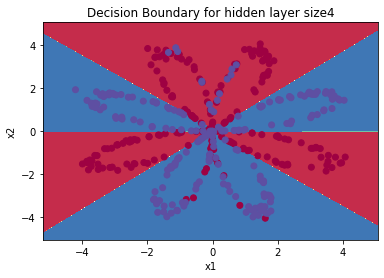

In [66]:
#正式运行
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
plt.title("Decision Boundary for hidden layer size" + str(4))

predictions = predict(parameters, X)
print('准确率：%d' % float((np.dot(Y, predictions.T) + np.dot(1-Y,1-predictions.T))/
                      float(Y.size)*100)+'%')

隐藏层的节点数量： 1  ，准确率: 67.25 %
隐藏层的节点数量： 2  ，准确率: 66.5 %
隐藏层的节点数量： 3  ，准确率: 89.25 %
隐藏层的节点数量： 4  ，准确率: 90.0 %
隐藏层的节点数量： 5  ，准确率: 89.75 %
隐藏层的节点数量： 20  ，准确率: 90.0 %
隐藏层的节点数量： 50  ，准确率: 89.75 %


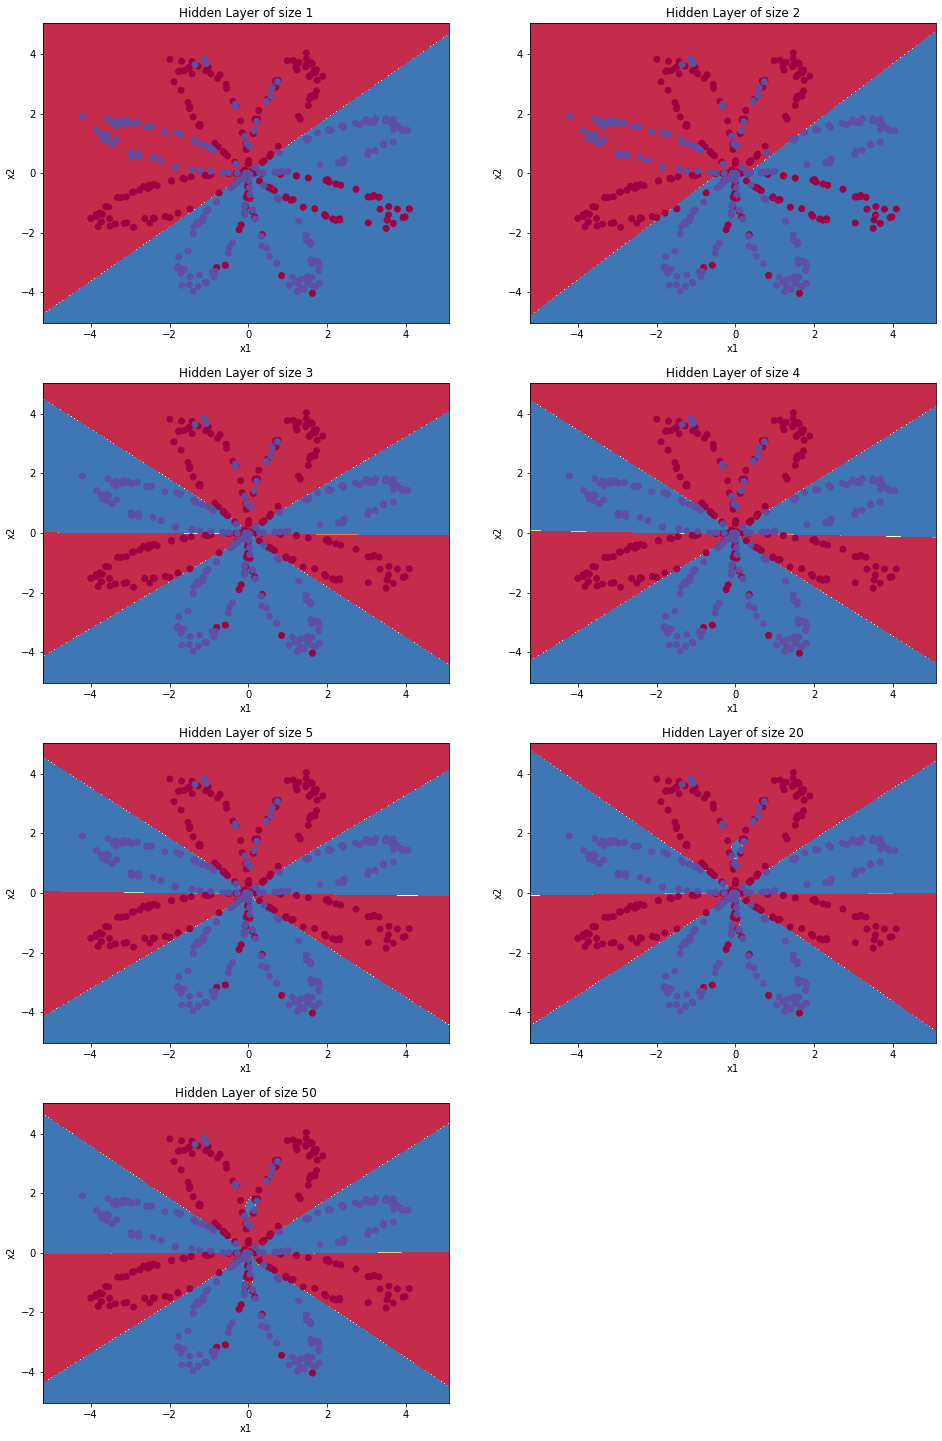

In [67]:
#更改隐藏层节点数量
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50] #隐藏层数量
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("隐藏层的节点数量： {}  ，准确率: {} %".format(n_h, accuracy))